In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
with ZipFile('dataset.zip') as zipFile:
#     df = pd.read_csv(zipFile.open('Case.csv'))
    df = pd.read_csv(zipFile.open('PatientInfo.csv'))
#     df = pd.read_csv(zipFile.open('Policy.csv'))
#     df = pd.read_csv(zipFile.open('Region.csv'))
#     df = pd.read_csv(zipFile.open('SearchTrend.csv'))
#     df = pd.read_csv(zipFile.open('SeoulFloating.csv'))
#     df = pd.read_csv(zipFile.open('Time.csv'))
#     df = pd.read_csv(zipFile.open('TimeAge.csv'))
#     df = pd.read_csv(zipFile.open('TimeGender.csv'))
#     df = pd.read_csv(zipFile.open('TimeProvince.csv'))
#     df = pd.read_csv(zipFile.open('Weather.csv'))
df.info()
df = df.drop(['patient_id',
              'country',
              'province',
              'city',
              'infected_by',
              'symptom_onset_date',
              'confirmed_date',
              'released_date',
              'deceased_date'], axis=1).dropna()
df = df[df['contact_number'].apply(lambda s: s.isnumeric())]
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB


,sex,age,infection_case,contact_number,state
0,male,50s,overseas inflow,75,released
1,male,30s,overseas inflow,31,released
2,male,50s,contact with patient,17,released
3,male,20s,overseas inflow,9,released
4,female,20s,contact with patient,2,released


In [3]:
ic_id = {k: v for v, k in enumerate(df['infection_case'].unique())}
state_id = {k: v for v, k in enumerate(df['state'].unique())}
dataset = pd.DataFrame({
    'sex'           : df['sex'].apply(lambda sex: 0 if sex == 'male' else 1),
    'age'           : df['age'].apply(lambda age: int(age[:-1]) // 10),
    'infection_case': df['infection_case'].apply(lambda case: ic_id[case]),
    'contact_number': df['contact_number'].apply(int),
    'target'        : df['state'].apply(lambda state: state_id[state])
})

X = dataset.drop('target', axis=1).to_numpy()
y = dataset.target.to_numpy()

In [4]:
dataset.describe()

,sex,age,infection_case,contact_number,target
count,716.000000,716.000000,716.000000,7.160000e+02,716.000000
mean,0.544693,3.951117,2.636872,1.703912e+07,0.670391
std,0.498347,1.839462,3.270890,3.221695e+08,0.940326
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,2.000000,1.000000,2.000000e+00,0.000000
50%,1.000000,4.000000,1.000000,4.000000e+00,0.000000
75%,1.000000,5.000000,4.000000,1.500000e+01,2.000000
max,1.000000,9.000000,15.000000,6.100000e+09,2.000000


(array([0, 1, 2]), array([473,   6, 237]))


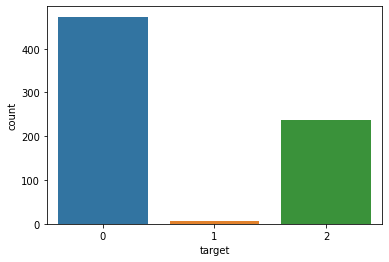

In [5]:
import seaborn as sns
print(np.unique(dataset.target, return_counts=True))
sns.countplot(x='target', data=dataset);

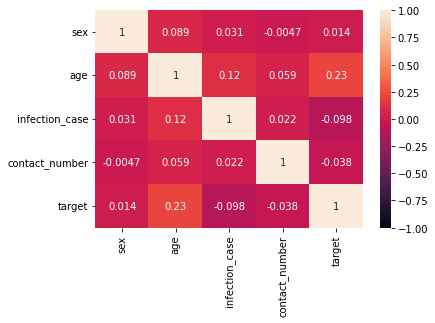

In [6]:
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True);

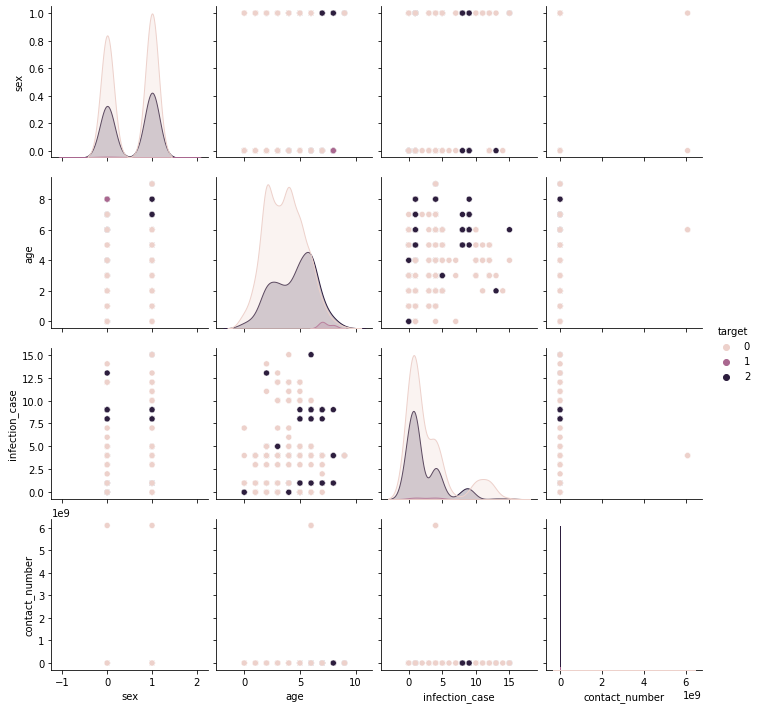

In [7]:
sns.pairplot(dataset, hue='target');

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.2)

knn_clf = KNeighborsClassifier()
svm_clf = SVC()
forest_clf = RandomForestClassifier()

def score_classifier(clf):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, pred)
    cv_score = cross_val_score(clf, X, y, cv=7, scoring='f1_weighted').mean()
    print('Accuracy score: %lf' % acc_score)
    print('Cross validation score: %lf' % cv_score)
    print(classification_report(y_test, pred))

In [52]:
score_classifier(knn_clf)

Accuracy score: 0.604167
Cross validation score: 0.581102
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        95
           1       0.00      0.00      0.00         1
           2       0.37      0.27      0.31        48

    accuracy                           0.60       144
   macro avg       0.35      0.35      0.35       144
weighted avg       0.57      0.60      0.58       144



/home/td2r/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/home/td2r/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/td2r/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/td2r/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are 

In [53]:
score_classifier(svm_clf)

Accuracy score: 0.659722
Cross validation score: 0.525611
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        95
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        48

    accuracy                           0.66       144
   macro avg       0.22      0.33      0.26       144
weighted avg       0.44      0.66      0.52       144



/home/td2r/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/home/td2r/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/td2r/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/td2r/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are 

In [55]:
score_classifier(forest_clf)

/home/td2r/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy score: 0.631944
Cross validation score: 0.620933
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        95
           1       0.00      0.00      0.00         1
           2       0.47      0.50      0.48        48

    accuracy                           0.63       144
   macro avg       0.40      0.40      0.40       144
weighted avg       0.64      0.63      0.63       144

